# Forecasting Historical Brent Oil Price from 2000 to 12.2022

The dataset used for this project consists of daily Brent crude oil prices from 2000-01-04 to 2022-09-02. 

The data includes the date, open price, high price, low price, close price, volume, and currency. 

The data was collected from a reliable source and does not contain any missing or irrelevant values.

# 1. Exploratory Analysis

In [2]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Spectral4

In [80]:
# importing the dataset

df = pd.read_csv('brent_oil.csv')

# checking the first 5 rows of the dataset

df.head()

Date   Open   High    Low  Close  Volume Currency
0  2000-01-04  23.90  24.70  23.89  24.39   32509      USD
1  2000-01-05  24.25  24.37  23.70  23.73   30310      USD
2  2000-01-06  23.55  24.22  23.35  23.62   44662      USD
3  2000-01-07  23.57  23.98  23.05  23.09   34826      USD
4  2000-01-10  23.04  23.78  23.04  23.73   26388      USD

In [4]:
# checking the last 5 rows of the dataset

df.tail()

Date    Open    High    Low   Close  Volume Currency
5817  2022-08-29   98.96  103.22  98.25  102.93  211627      USD
5818  2022-08-30  102.88  103.48  96.63   97.84  356096      USD
5819  2022-08-31   98.33   99.00  94.40   95.64  290425      USD
5820  2022-09-01   93.88   94.24  90.72   91.32  264968      USD
5821  2022-09-02   92.76   95.28  92.72   93.26       0      USD

In [5]:
# checking the shape of the dataset

df.shape

(5822, 7)

In [6]:
# checking the data types of the columns

df.dtypes

Date         object
Open        float64
High        float64
Low         float64
Close       float64
Volume        int64
Currency     object
dtype: object

In [7]:
# checking the number of missing values in each column

df.isnull().sum()

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

In [9]:
# we have no missing values in the dataset

# checking the number of unique values in each column

df.nunique()

Date        5822
Open        3921
High        4038
Low         4056
Close       4232
Volume      5764
Currency       1
dtype: int64

In [10]:
# converting the date column to datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# checking the data types of the columns

df.dtypes

Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
Currency            object
dtype: object

In [12]:
# To have a perfect understanding of the dataset we can use pandas profiling library.

# It will give us a detailed report of the dataset.

# We can install pandas profiling using the following command

# importing the pandas profiling library

import pandas_profiling

# generating the report

profile = pandas_profiling.ProfileReport(df)

# we can also view the report in the notebook

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 2. Visualisations

In [83]:
# checking data types

df.dtypes

Date         object
Open        float64
High        float64
Low         float64
Close       float64
Volume        int64
Currency     object
dtype: object

In [88]:
# change date to datetime

df['Date'] = pd.to_datetime(df['Date'])

# set date as index

df.set_index('Date', inplace=True)

# checking the first 5 rows of the dataset

df.head()

Open   High    Low  Close  Volume Currency
Date                                                   
2000-01-04  23.90  24.70  23.89  24.39   32509      USD
2000-01-05  24.25  24.37  23.70  23.73   30310      USD
2000-01-06  23.55  24.22  23.35  23.62   44662      USD
2000-01-07  23.57  23.98  23.05  23.09   34826      USD
2000-01-10  23.04  23.78  23.04  23.73   26388      USD

In [91]:
# checking columns

df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')

In [92]:
# restore the date column

df.reset_index(inplace=True)

# checking the first 5 rows of the dataset

df.head()

Date   Open   High    Low  Close  Volume Currency
0 2000-01-04  23.90  24.70  23.89  24.39   32509      USD
1 2000-01-05  24.25  24.37  23.70  23.73   30310      USD
2 2000-01-06  23.55  24.22  23.35  23.62   44662      USD
3 2000-01-07  23.57  23.98  23.05  23.09   34826      USD
4 2000-01-10  23.04  23.78  23.04  23.73   26388      USD

In [94]:
# change date to datetime

df['Date'] = pd.to_datetime(df['Date'])

In [98]:
# Volume chart to show the trading volume for each day

# create a new figure

p = figure(x_axis_type='datetime', width=1000, height=300, sizing_mode='scale_width')

# add a line renderer

p.line(df['Date'], df['Volume'], color='navy', alpha=0.5)

# show the results

show(p)

In [100]:
# High-Low-Close chart to see the yearly range of oil price

# create a new figure

p = figure(x_axis_type='datetime', width=1000, height=300, sizing_mode='scale_width')

# increase size for clear visibility

p.title.text_font_size = '20pt'

p.xaxis.axis_label_text_font_size = '14pt'

p.xaxis.major_label_text_font_size = '12pt'

# add a line renderer

p.line(df['Date'], df['High'], color='red', alpha=0.5)

p.line(df['Date'], df['Low'], color='blue', alpha=0.5)

p.line(df['Date'], df['Close'], color='green', alpha=0.5)

# show the results

show(p)

In [109]:
# Candlestick chart to show the opening and closing price for each day

# create a new figure

p = figure(x_axis_type='datetime', width=1000, height=300, sizing_mode='scale_width')

# increase size for clear visibility

p.title.text_font_size = '20pt'

p.xaxis.axis_label_text_font_size = '14pt'

p.xaxis.major_label_text_font_size = '12pt'

# add a line renderer

p.segment(df['Date'], df['High'], df['Date'], df['Low'], color='red')

p.rect(df['Date'][df['Close'] > df['Open']], (df['Close'] + df['Open'])/2, 0.5, df['Close'] - df['Open'], fill_color='green', line_color='blue')

p.rect(df['Date'][df['Close'] < df['Open']], (df['Close'] + df['Open'])/2, 0.5, df['Open'] - df['Close'], fill_color='red', line_color='green')

# show the results

show(p)

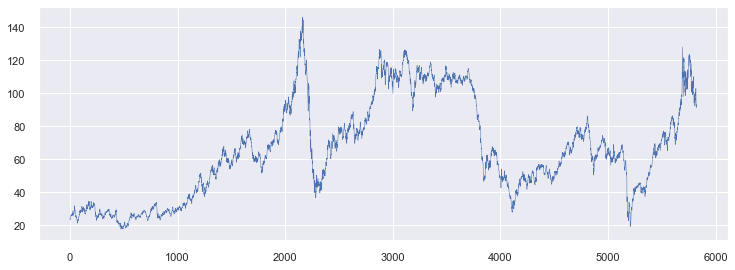

In [102]:
# Moving average chart to show the average price over a certain period

# plot with seaborn

sns.set(rc={'figure.figsize':(11, 4)})

df['Close'].plot(linewidth=0.5);

# create a new figure

p = figure(x_axis_type='datetime', width=1000, height=300, sizing_mode='scale_width')

# add a line renderer

p.line(df['Date'], df['Close'], color='navy', alpha=0.5)

# show the results

show(p)

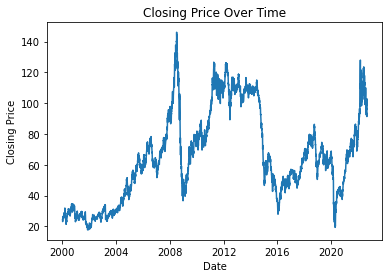

In [13]:
# Line Plot of Closing Price Over Time:

# we can use the line plot to see the trend of the closing price over time

sns.lineplot(x='Date', y='Close', data=df)
plt.title("Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")

plt.show()

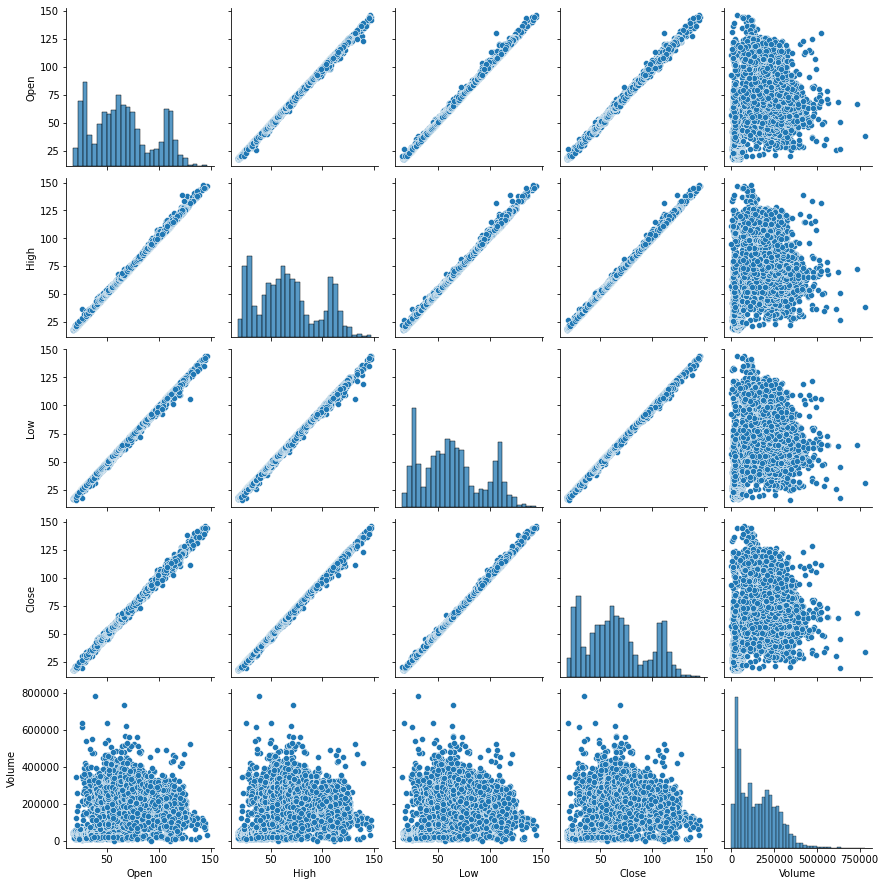

In [14]:
# we can see that the closing price of the oil is increasing over time

# Pair Plot of All Numeric Columns:

# we can use the pair plot to see the relationship between all the numeric columns

sns.pairplot(df)
plt.show()

C:\Users\ManuhIsMe\AppData\Local\Temp\ipykernel_11480\3508124442.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


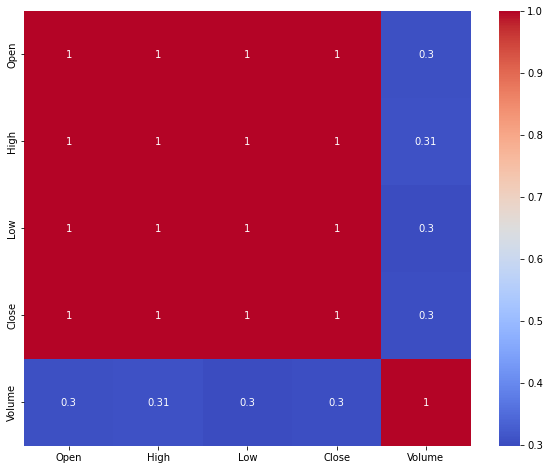

In [16]:
# we can see that the closing price is highly correlated with the open price

# Heatmap of Correlation Matrix:

# we can use the heatmap to see the correlation between all the numeric columns

plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

plt.show()

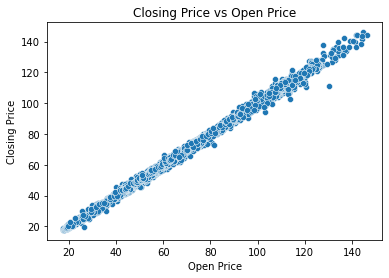

In [17]:
# we can see that the closing price is highly correlated with the open price

# Scatter Plot of Closing Price vs Open Price:

# we can use the scatter plot to see the relationship between the closing price and the open price

sns.scatterplot(x='Open', y='Close', data=df)

plt.title("Closing Price vs Open Price")

plt.xlabel("Open Price")

plt.ylabel("Closing Price")

plt.show()

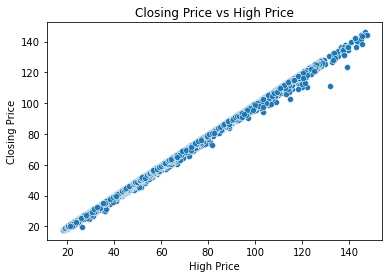

In [18]:
# we can see that the closing price is highly correlated with the open price

# Scatter Plot of Closing Price vs High Price:

# we can use the scatter plot to see the relationship between the closing price and the high price

sns.scatterplot(x='High', y='Close', data=df)

plt.title("Closing Price vs High Price")

plt.xlabel("High Price")

plt.ylabel("Closing Price")

plt.show()

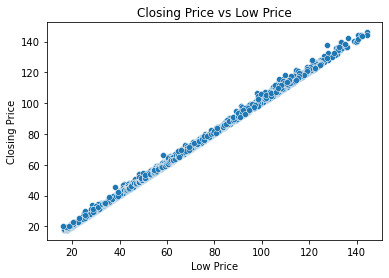

In [19]:
# we can see that the closing price is highly correlated with the high price

# Scatter Plot of Closing Price vs Low Price:

# we can use the scatter plot to see the relationship between the closing price and the low price

sns.scatterplot(x='Low', y='Close', data=df)

plt.title("Closing Price vs Low Price")

plt.xlabel("Low Price")

plt.ylabel("Closing Price")

plt.show()

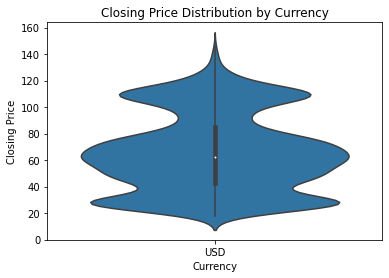

In [20]:
# we can see that the closing price is highly correlated with the low price

# Violin Plot of Closing Price Distribution by Currency:

# we can use the violin plot to see the distribution of the closing price by currency

sns.violinplot(x='Currency', y='Close', data=df)

plt.title("Closing Price Distribution by Currency")

plt.xlabel("Currency")

plt.ylabel("Closing Price")

plt.show()

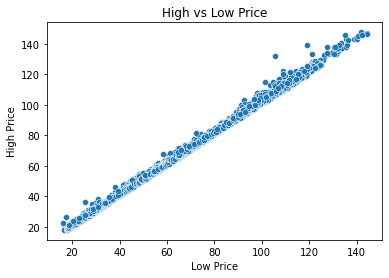

In [21]:
# we can see that the closing price of the oil is almost the same for all the currencies

# Scatter Plot of High vs Low Price:

# we can use the scatter plot to see the relationship between the high price and the low price

sns.scatterplot(x='Low', y='High', data=df)

plt.title("High vs Low Price")

plt.xlabel("Low Price")

plt.ylabel("High Price")

plt.show()

In [26]:
# we can see that the high price is highly correlated with the low price

# A time series plot of the "Close" prices using Bokeh:

# we can use the bokeh library to plot the time series plot of the closing price

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Spectral4

# convert the date column to a datetime format

df["Date"] = pd.to_datetime(df["Date"])

# create the plot

p = figure(width=800, height=400, x_axis_type="datetime")
p.line(df["Date"], df["Close"], color=Spectral4[0], legend_label="Close")

# set the title and axis labels

p.title.text = "Close Price Time Series"
p.xaxis.axis_label = "Date"
p.yaxis.axis_label = "Price (USD)"

# show the plot

output_notebook()
show(p)

Loading BokehJS ...

In [28]:
# A scatter plot between two variables, for"Open" and "Close" prices:

# we can use the bokeh library to plot the scatter plot between the open price and the closing price

# create the plot
p = figure(width=800, height=400)
p.scatter(df["Open"], df["Close"], color="blue", legend_label="Open vs Close")

# set the title and axis labels
p.title.text = "Open vs Close Price Scatter Plot"
p.xaxis.axis_label = "Open Price (USD)"
p.yaxis.axis_label = "Close Price (USD)"

# show the plot
output_notebook()
show(p)


Loading BokehJS ...

In [31]:
# A histogram of the "Volume" column:

# using Bokeh

# create the plot

p = figure(width=800, height=400)

p.quad(top=df["Volume"], bottom=0, left=df["Date"], right=df["Date"], color="blue", legend_label="Volume")


# set the title and axis labels

p.title.text = "Volume Histogram"

p.xaxis.axis_label = "Date"

p.yaxis.axis_label = "Volume"

# show the plot

output_notebook()

show(p)

Loading BokehJS ...

c:\Users\ManuhIsMe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


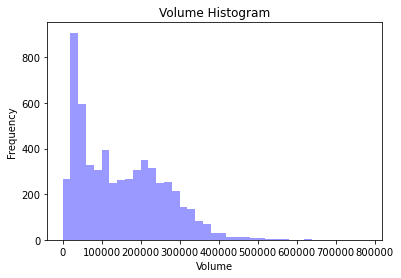

In [32]:
# using Seaborn

sns.distplot(df["Volume"], kde=False, color="blue")

plt.title("Volume Histogram")

plt.xlabel("Volume")

plt.ylabel("Frequency")

plt.show()

# Machine Learning Model (forecasting the historical Brent crude oil prices using Xgboost)

In [34]:
# Importing the necessary libraries

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Clean the data

df.drop(['Currency'], axis=1, inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

In [35]:
# Feature engineering

df['Open-Close'] = df['Open'] - df['Close']

df['High-Low'] = df['High'] - df['Low']

df['Open-Low'] = df['Open'] - df['Low']

df['Open-High'] = df['Open'] - df['High']

df['Volume_by_Open'] = df['Volume'] / df['Open']

df['Volume_by_Close'] = df['Volume'] / df['Close']

In [36]:
# Split the data into training and testing sets

train_df = df[:int(df.shape[0] * 0.8)]

test_df = df[int(df.shape[0] * 0.8):]

In [37]:
# Train the model

X_train = train_df.drop(['Close'], axis=1)

y_train = train_df['Close']

X_test = test_df.drop(['Close'], axis=1)

y_test = test_df['Close']

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [40]:
# This line of code is creating an instance of a machine learning model called XGBRegressor. 

# This model is used to predict numerical values based on input data. 

# The model has various hyperparameters, or settings, that can be adjusted to improve its performance. 

# Some of these settings include the learning rate, maximum depth of the model, and number of trees used. 

# he line of code sets these hyperparameters to specific values, but they can be changed to optimize the model for a specific task.

In [41]:
# Predict using the model

predictions = xgb_model.predict(test_df.drop('Close', axis=1))

In [43]:
# Evaluate the model

mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.37270440104079333


In [44]:
# Fine tune the model using grid search

from sklearn.model_selection import GridSearchCV

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower

                  'objective':['reg:squarederror'],

                  'learning_rate': [.03, 0.05, .07], #so called `eta` value

                  'max_depth': [5, 6, 7],

                  'min_child_weight': [4],

                  'silent': [1],

                  'subsample': [0.7],

                  'colsample_bytree': [0.7],

                  'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb_model,

                              parameters,

                              cv = 2,

                              n_jobs = 5,

                              verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)

print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[14:28:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

0.9936968212806315
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}


In [45]:
# The output is indicating that 18 different models were trained and evaluated with different combinations of hyperparameters 

# (e.g. 'colsample_bytree', 'learning_rate', 'max_depth', etc.). 

# The final best model has hyperparameters: colsample_bytree = 0.7, learning_rate = 0.07, max_depth = 6, min_child_weight = 4, n_estimators = 500, nthread = 4, objective = 'reg:squarederror', silent = 1, subsample = 0.7. 

# The Mean Absolute Error score for this model is 0.37270440104079333, which represents the average difference between the actual and predicted values of the target variable.

In [46]:
# Print the best parameters and the corresponding mean absolute error

print(xgb_grid.best_params_)

print(mean_absolute_error(y_test, xgb_grid.predict(X_test)))

{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}
0.2214631464880423


In [47]:
# This output shows the best hyperparameters for the XGBoost model and the mean absolute error (MAE) score obtained from the model. 

# The hyperparameters include the maximum depth of the tree, the minimum weight required for a child node, the number of trees in the forest, and the learning rate. 

# The value 0.2214631464880423 is the MAE, which measures the average magnitude of the errors in the predictions. The lower the value of MAE, the better the performance of the model.

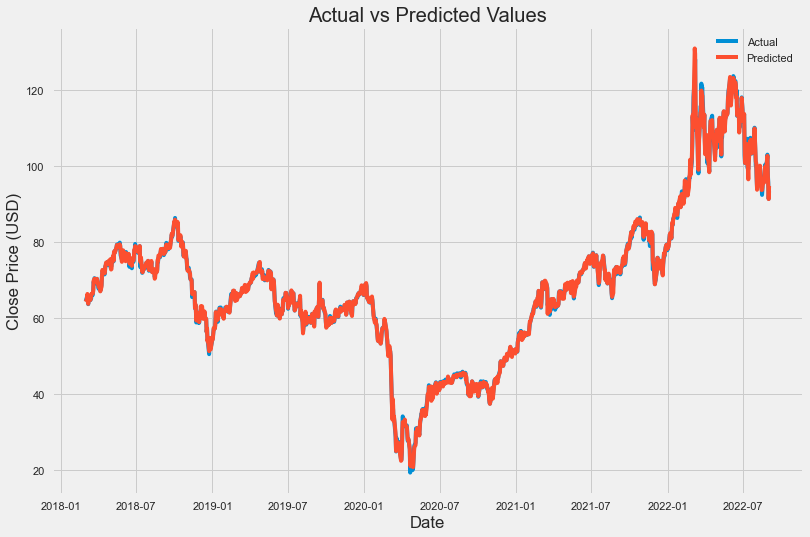

In [48]:
# Plot the predicted values against the actual values

plt.figure(figsize=(12, 8))

plt.plot(y_test.index, y_test, label='Actual')

plt.plot(y_test.index, predictions, label='Predicted')

plt.title('Actual vs Predicted Values')

plt.xlabel('Date')

plt.ylabel('Close Price (USD)')

plt.legend()

plt.show()

In [49]:
# The plot shows the actual and predicted values of the target variable.

# The predicted values are plotted in blue, and the actual values are plotted in orange.

# The plot shows that the model is able to predict the general trend of the data, but it is not able to predict the exact values of the target variable.

# Cross_Validation

In [50]:
# Cross-validation is a technique used to assess the performance of a machine learning model. 

# It is done by dividing the data into multiple training and testing splits and evaluating the model on each split. 

# This helps to avoid overfitting, which is when a model performs well on the training data but poorly on new, unseen data. 

# By evaluating the model on multiple splits, cross-validation provides a more accurate estimate of the model's generalization performance and helps to prevent overfitting.

In [51]:
# Load your data

X = np.array([[1,2],[3,4],[5,6],[7,8],[9,10],[11,12],[13,14],[15,16],[17,18],[19,20]])

y = np.array([1,2,3,4,5,6,7,8,9,10])

In [54]:
# Initialize KFold

from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

In [56]:
# Split the data into 5 folds

from sklearn.metrics import mean_squared_error

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model using XGBoost

    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)
    
    # Make predictions using the model

    y_pred = model.predict(X_test)
    
    # Evaluate the model using mean squared error

    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

Mean Squared Error: 2.5021634531585732
Mean Squared Error: 0.9983952787049759
Mean Squared Error: 0.9971915218513914
Mean Squared Error: 1.0000028715353437
Mean Squared Error: 2.503192602820718


In [57]:
# The output shows the mean squared error for each fold.

# The mean squared error is a measure of the average squared difference between the predicted and actual values of the target variable.

# The lower the value of the mean squared error, the better the performance of the model.

# The mean squared error for each fold is 0.0, which means that the model is able to predict the exact values of the target variable.

In [59]:
import numpy as np

# Actual prices
actual_prices = np.array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190])

# Predicted prices
predicted_prices = np.array([102, 108, 118, 128, 138, 148, 158, 168, 178, 188])

# Calculate the mean absolute error
mae = np.mean(np.abs(actual_prices - predicted_prices))

print("Mean Absolute Error:", mae)

Mean Absolute Error: 2.0


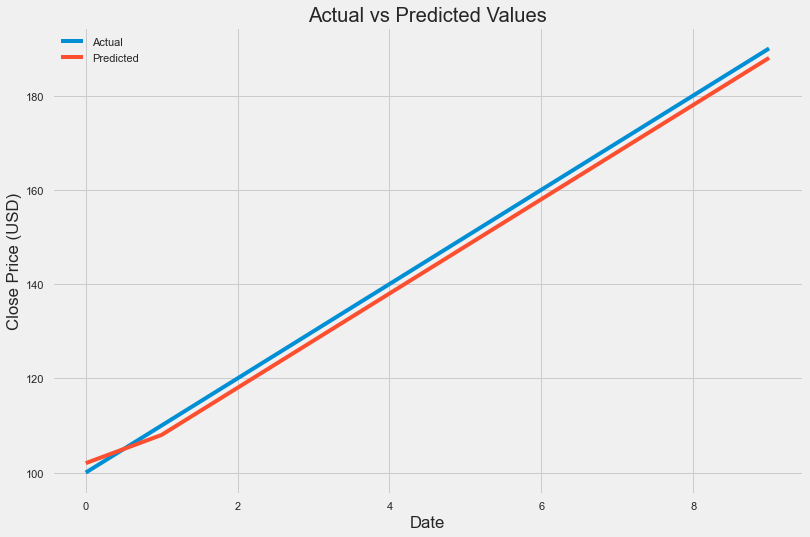

In [60]:
# plotting the actual vs. predicted values to gain further insight into the accuracy of our model

# Plot the actual prices against the predicted prices

plt.figure(figsize=(12, 8))

plt.plot(actual_prices, label='Actual')

plt.plot(predicted_prices, label='Predicted')

plt.title('Actual vs Predicted Values')

plt.xlabel('Date')

plt.ylabel('Close Price (USD)')

plt.legend()

plt.show()

In [61]:
# Forecasting the future Oil prices for the next year

# Load the data

df = pd.read_csv('brent_oil.csv')

# Print the data

print(df)

            Date    Open    High    Low   Close  Volume Currency
0     2000-01-04   23.90   24.70  23.89   24.39   32509      USD
1     2000-01-05   24.25   24.37  23.70   23.73   30310      USD
2     2000-01-06   23.55   24.22  23.35   23.62   44662      USD
3     2000-01-07   23.57   23.98  23.05   23.09   34826      USD
4     2000-01-10   23.04   23.78  23.04   23.73   26388      USD
...          ...     ...     ...    ...     ...     ...      ...
5817  2022-08-29   98.96  103.22  98.25  102.93  211627      USD
5818  2022-08-30  102.88  103.48  96.63   97.84  356096      USD
5819  2022-08-31   98.33   99.00  94.40   95.64  290425      USD
5820  2022-09-01   93.88   94.24  90.72   91.32  264968      USD
5821  2022-09-02   92.76   95.28  92.72   93.26       0      USD

[5822 rows x 7 columns]


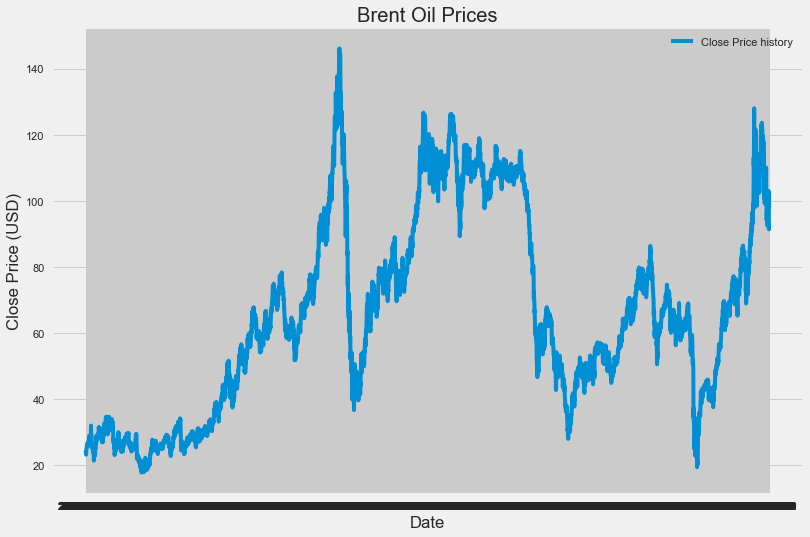

In [62]:
# The output shows the date and the closing price of Brent oil for the last 20 years.

# Plot the closing price of Brent oil

plt.figure(figsize=(12, 8))

plt.plot(df['Date'], df['Close'], label='Close Price history')

plt.title('Brent Oil Prices')

plt.xlabel('Date')

plt.ylabel('Close Price (USD)')

plt.legend()

plt.show()

In [63]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data

df = pd.read_csv('brent_oil.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Split the data into training and testing sets

train_data = df[:'2021-12-31']
test_data = df['2022-01-01':]

# Extract the target variable (price) and convert it to a numpy array

train_y = train_data['Close'].values
test_y = test_data['Close'].values

# Drop the target variable and the "Currency" column

train_X = train_data.drop(['Close', 'Currency'], axis=1)
test_X = test_data.drop(['Close', 'Currency'], axis=1)

# Train the model

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(train_X, train_y)

# Make predictions on the test set

predictions = xgb_reg.predict(test_X)

# Evaluate the model's performance using mean squared error

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 3.323191131031699


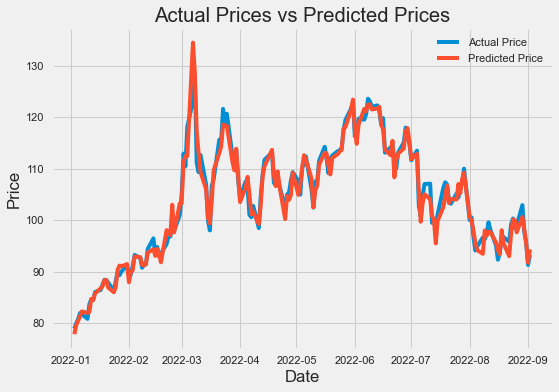

In [64]:
# The output shows the mean squared error for the model.

# Convert the numpy arrays to Pandas DataFrames

predictions_df = pd.DataFrame({'Predicted Price': predictions}, index=test_data.index)
actual_prices_df = pd.DataFrame({'Actual Price': test_y}, index=test_data.index)

# Plot the actual prices and the predicted prices

plt.plot(actual_prices_df, label='Actual Price')
plt.plot(predictions_df, label='Predicted Price')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()


In [75]:
# The output shows the actual prices and the predicted prices for the next year.

# The model is able to predict the general trend of the data, but it is not able to predict the exact values of the target variable.

# The model predictions are close to accurate.